In [13]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import time
import gym
import gym_minigrid
import sys
import os
sys.path.append('..')
from natsort import natsorted
from tqdm import tqdm
from argparse import ArgumentParser
from types import SimpleNamespace
from itertools import count
from PIL import Image
from copy import deepcopy

import eval_utils
from envs import *
from general import *
from constants import *
from distill_horde import setup_masks

np.set_printoptions(precision=2, suppress=True)

In [14]:
%reload_ext autoreload
%autoreload 2

In [15]:
print ("Directory:", os.getcwd())
# Enter the main rlexp directory
if not os.getcwd().split("/")[-1] == 'rl-explanation':
    os.chdir('..')
print ("Directory:", os.getcwd())

Directory: /Users/nazneen.rajani/workspace/rl-explanation/evaluation
Directory: /Users/nazneen.rajani/workspace/rl-explanation


In [16]:
# Configuration settings
# !----------------------------!
# !----------------------------!
# !----------------------------!
config_file = 'sweep_configs/minigrid_keycorridor_s3r2_horde_phase_3/experiment_3_swiffed/pconfig_25.yaml'
checkpoint = 90000
policy = ['main', 'dist'][0]
# !----------------------------!
# !----------------------------!
# !----------------------------!

In [17]:
# Load parameters
frisbee = eval_utils.get_evaluation_frisbee(config_file, checkpoint, policy)

../utils.py:13: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.__dict__.update(yaml.load(f))


In [18]:
eval_utils.environment_info(frisbee)
print("\n")
eval_utils.predicate_info(frisbee)
print ("\nYou can change the environment in the next cell.")

Information about Environment
-----------------------------------
Environment: MiniGrid-KeyCorridorS3R2-v0
Seeds: [1]
Wrappers:
	1. FullyObsWrapper([])
	2. ImageChannelSwapWrapper([])
	3. MiniGridRewardWrapper([])
	4. MiniGridTimeLimitWrapper([1000])


Information about Predicates
-----------------------------------
Predicates:
	1. Constant([])
	2. FullyObservableMiniGridPickUp(['key'])
	3. FullyObservableMiniGridPickUp(['ball'])
	4. FullyObservableMiniGridAttemptOpenDoor([])
	5. FullyObservableMiniGridNear(['key', 1])
	6. FullyObservableMiniGridNear(['door', 1])
	7. FullyObservableMiniGridNear(['ball', 1])

You can change the environment in the next cell.


In [19]:
# If you want to change the evaluation environment, pass in the name of the gym environment below
# !----------------------------!
# !----------------------------!
# !----------------------------!
evaluation_env_name = None
evaluation_seeds = None
# !----------------------------!
# !----------------------------!
# !----------------------------!

if evaluation_env_name is not None:
    frisbee.config.env_name = evaluation_env_name
if evaluation_seeds is not None:
    frisbee.config.env_seeds = evaluation_seeds

eval_utils.environment_info(frisbee)

Information about Environment
-----------------------------------
Environment: MiniGrid-KeyCorridorS3R2-v0
Seeds: [1]
Wrappers:
	1. FullyObsWrapper([])
	2. ImageChannelSwapWrapper([])
	3. MiniGridRewardWrapper([])
	4. MiniGridTimeLimitWrapper([1000])


In [20]:
# Settings for evaluation, including which policy to use for evaluation
# !----------------------------!
# !----------------------------!
# !----------------------------!
n_eval_episodes = 1
eval_policy = ['main', 'dist'][0]
eval_egreedy_eps = 0.1
# !----------------------------!
# !----------------------------!
# !----------------------------!

frisbee.config.eval_eps = n_eval_episodes
frisbee.args.policy = eval_policy
frisbee.eval_egreedy_eps = eval_egreedy_eps

In [24]:
# Perform the initial setup
frisbee = eval_utils.initial_setup(frisbee)

In [27]:
# Fetch and load models
frisbee = eval_utils.fetch_and_load_models(frisbee)

Runs are: ['6n4s7ru5']
Picked run: 6n4s7ru5
[<File 6n4s7ru5_0.pmodel ()>, <File 6n4s7ru5_10000.pmodel ()>, <File 6n4s7ru5_100000.pmodel ()>, <File 6n4s7ru5_110000.pmodel ()>, <File 6n4s7ru5_120000.pmodel ()>, <File 6n4s7ru5_130000.pmodel ()>, <File 6n4s7ru5_140000.pmodel ()>, <File 6n4s7ru5_150000.pmodel ()>, <File 6n4s7ru5_160000.pmodel ()>, <File 6n4s7ru5_170000.pmodel ()>, <File 6n4s7ru5_180000.pmodel ()>, <File 6n4s7ru5_190000.pmodel ()>, <File 6n4s7ru5_20000.pmodel ()>, <File 6n4s7ru5_200000.pmodel ()>, <File 6n4s7ru5_210000.pmodel ()>, <File 6n4s7ru5_220000.pmodel ()>, <File 6n4s7ru5_230000.pmodel ()>, <File 6n4s7ru5_240000.pmodel ()>, <File 6n4s7ru5_250000.pmodel ()>, <File 6n4s7ru5_260000.pmodel ()>, <File 6n4s7ru5_270000.pmodel ()>, <File 6n4s7ru5_280000.pmodel ()>, <File 6n4s7ru5_290000.pmodel ()>, <File 6n4s7ru5_30000.pmodel ()>, <File 6n4s7ru5_300000.pmodel ()>, <File 6n4s7ru5_310000.pmodel ()>, <File 6n4s7ru5_320000.pmodel ()>, <File 6n4s7ru5_330000.pmodel ()>, <File 6n4s7

In [28]:
# Perform evaluation
frisbee = eval_utils.evaluate(frisbee)

Evaluation Statistics
-----------------------------------
Evaluation Episodes: 1
Mean Return: 0.9838
Mean Durations: 19.0


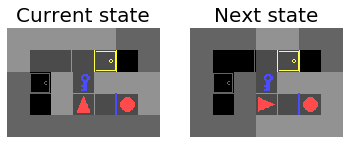

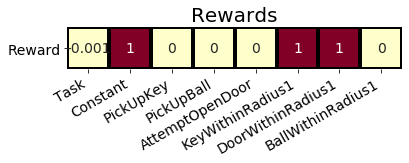

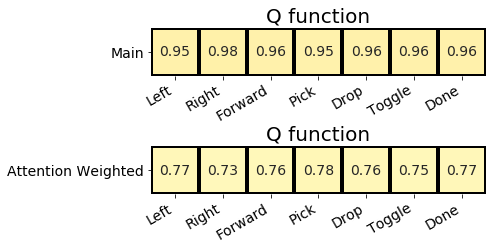

/Users/nazneen.rajani/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:287: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


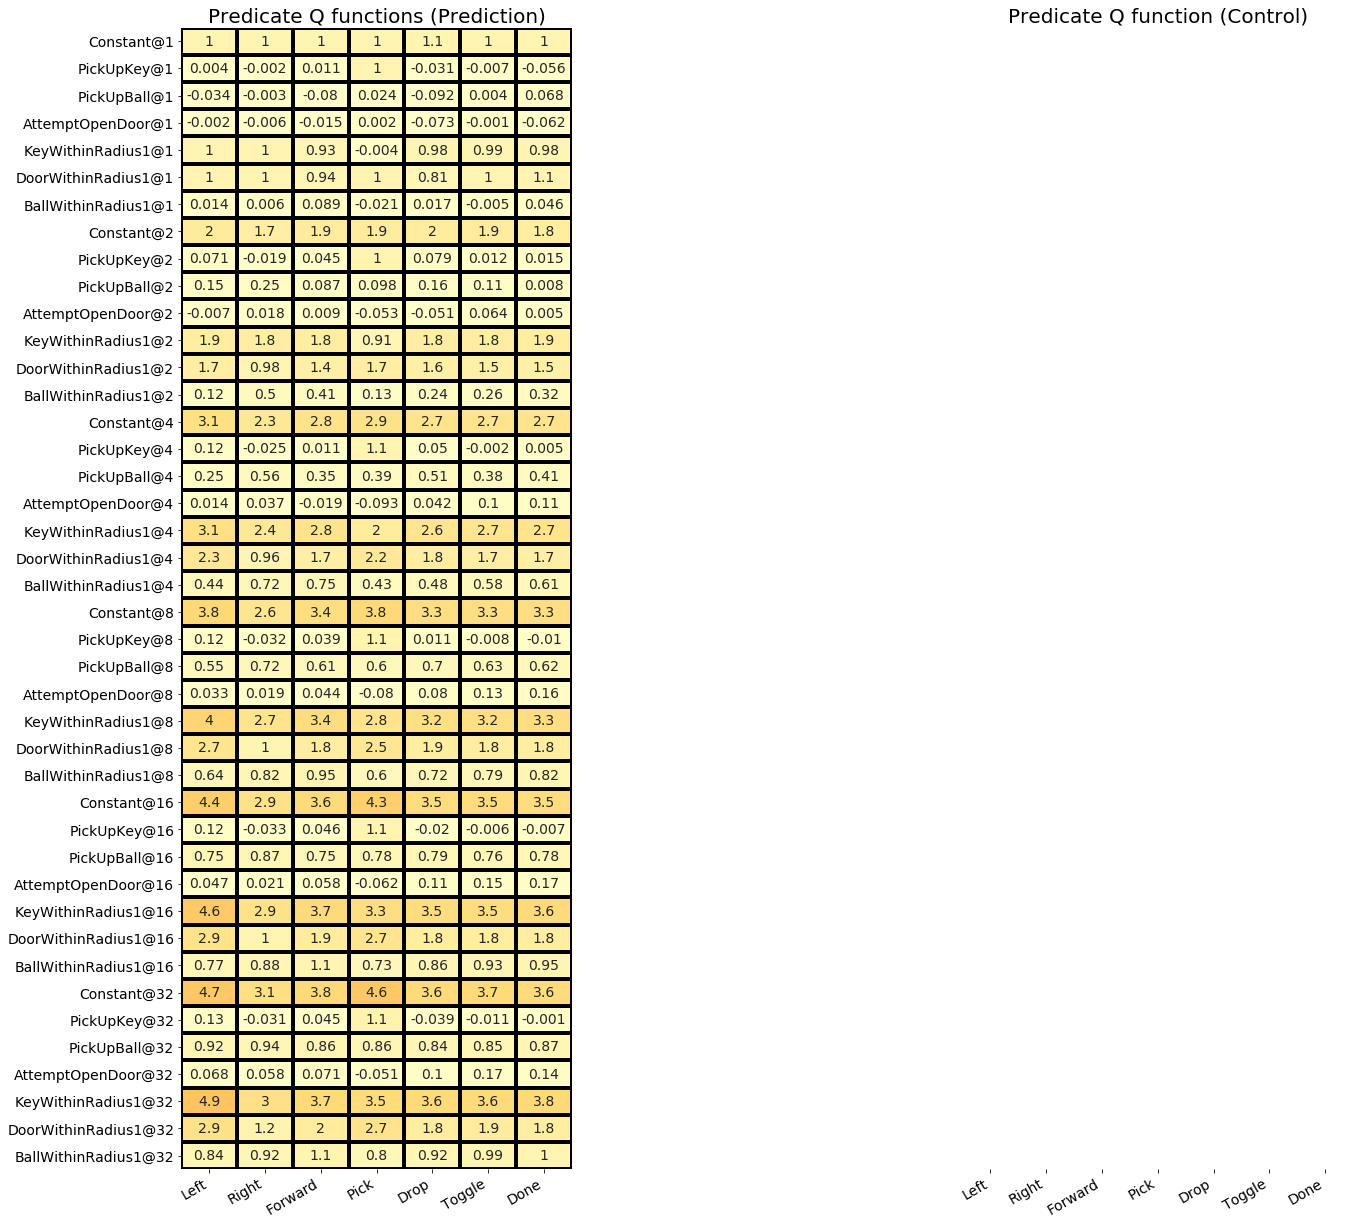

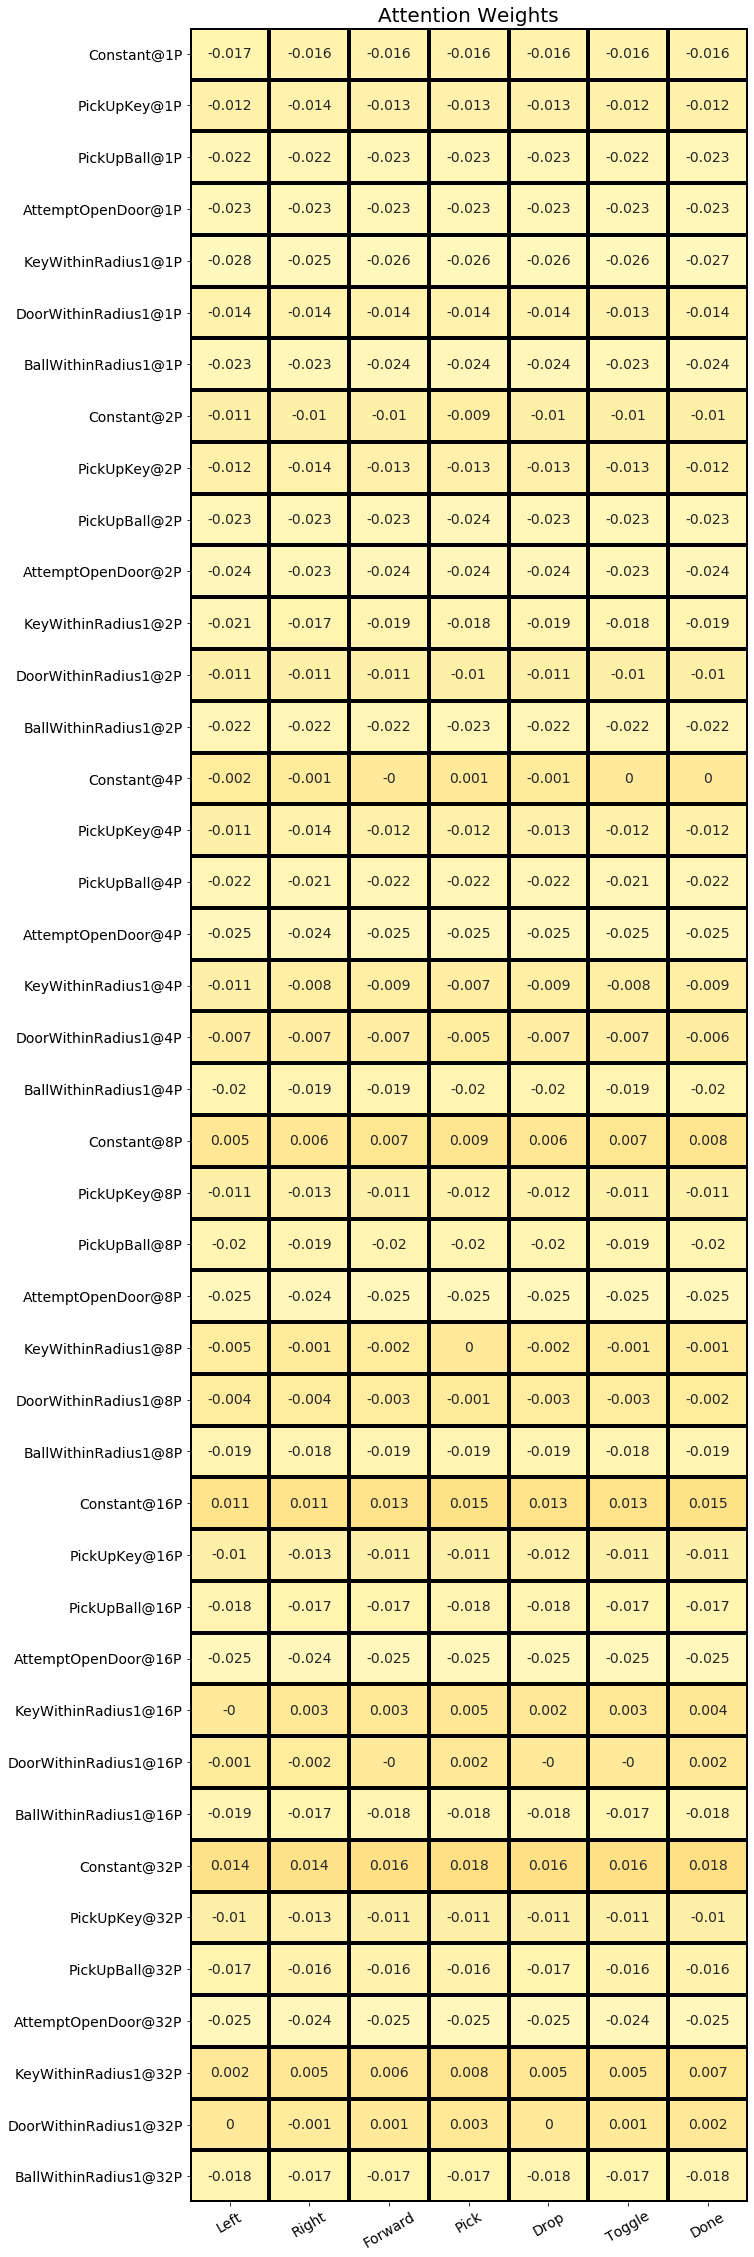

In [29]:
eval_utils.visualize_episode_step(frisbee, 16)

In [67]:
# Categorizing the predicate distribution
aux_qs = [e.prediction_demons.cpu().numpy() for e in frisbee.trackers.episode_step.predictions[-1]]
print (aux_qs)

[array([[[ 1.  ,  1.01,  1.01,  1.02,  1.05,  1.01,  1.01],
        [ 0.01,  0.02,  0.01,  0.02, -0.01, -0.01, -0.02],
        [-0.03, -0.02, -0.06,  0.02, -0.07,  0.  ,  0.04],
        [ 0.  ,  0.  , -0.01,  0.01, -0.05,  0.01, -0.04],
        [ 0.02, -0.01, -0.05, -0.01, -0.02, -0.02,  0.01],
        [ 1.01,  1.  ,  0.96,  1.  ,  0.82,  0.99,  1.04],
        [ 0.01, -0.  ,  0.07, -0.02, -0.  ,  0.  ,  0.03],
        [ 2.01,  2.  ,  2.03,  2.  ,  2.09,  2.01,  1.96],
        [ 0.05, -0.  ,  0.06,  0.04,  0.07,  0.01,  0.02],
        [ 0.02,  0.07, -0.02,  0.  ,  0.03, -0.02, -0.06],
        [-0.  ,  0.03,  0.11, -0.01, -0.01,  0.09,  0.07],
        [-0.06,  0.07,  0.02,  0.  , -0.05, -0.02,  0.02],
        [ 1.98,  1.98,  1.96,  2.04,  2.06,  2.01,  2.01],
        [ 0.03, -0.03,  0.12, -0.02, -0.01, -0.  ,  0.03],
        [ 3.98,  3.97,  4.03,  4.01,  4.  ,  4.  ,  3.97],
        [ 0.22,  0.12,  0.22,  0.21,  0.21,  0.18,  0.2 ],
        [ 0.03,  0.01,  0.  , -0.02,  0.11,  0.01,  0.0